In [1]:
#import all libraries required for this project
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Background:
    Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial
    discrimination in the United States labor market by randomly assigning identical rÃ©sumÃ©s to black-sounding or white-sounding names 
    and observing the impact on requests for interviews from employers.
    
### Data:

    "In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and 
    white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.Note
    that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.
    
    You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.
    
    1. What test is appropriate for this problem? Does CLT apply?
    
    2. What are the null and alternate hypotheses?
    
    3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist 
       statistical approaches.
       
    4. Write a story describing the statistical significance in the context or the original problem.
    
    5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would
       you amend your analysis?
        
    
#### Resources:
[Markdown syntax:](http://nestacms.com/docs/creating-content/markdown-cheat-sheet)

[Experiment information and data source:]( http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states)

[Scipy statistical methods: ](http://docs.scipy.org/doc/scipy/reference/stats.html)

[Formulas for the Bernoulli distribution: ](https://en.wikipedia.org/wiki/Bernoulli_distribution)

In [14]:
#First, let's expore the data:
#data = pd.io.stata.read_stata('C:/Users//EDA_racial_discrimination/data/us_job_market_discrimination.dta')

In [4]:
data.head(2)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [5]:
#Columns:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

In [6]:
data.shape

(4870, 65)

In [7]:
#Segregate date based on number of black-sounding names(b) and white-sounding names(w)
w = data[data.race=='w']
b = data[data.race=='b']

# number of callbacks for black-sounding names(n_b)
n_b =sum(data[data.race=='b'].call)
print(f"Number of callbacks for black-sounding names(n_b) :{n_b}")
n_w =sum(data[data.race=='w'].call)
print(f"Number of callbacks for white-sounding names(n_w) :{n_w}")

# number of black-sounding names
n1 = len(b)
print(f"Total number of black-sounding names(n1): {len(b)}")
# number of white-sounding names
n2 = len(w)
print(f"Total number of white-sounding names(n2): {len(w)}")
#proportion  of callback for black-sounding names
p1 =  n_b/len(b)
print(f"Callback rates for black sounding names(p1*100): {p1*100}")   
#  proportion of white Callback
p2 = n_w/len(w)
print(f"Callback rates for white-sounding names(p2*100): {p2*100}")  


Number of callbacks for black-sounding names(n_b) :157.0
Number of callbacks for white-sounding names(n_w) :235.0
Total number of black-sounding names(n1): 2435
Total number of white-sounding names(n2): 2435
Callback rates for black sounding names(p1*100): 6.447638603696099
Callback rates for white-sounding names(p2*100): 9.650924024640657


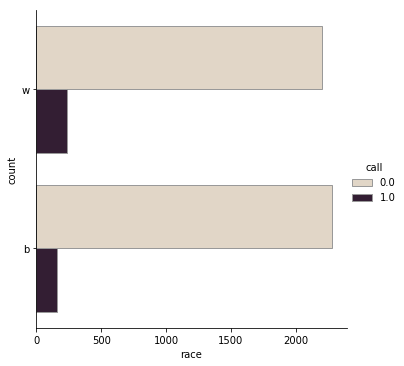

In [8]:
# Let's do the EDA first and make bee swarm
#I'll create a row count column that we can use as our y-axis\n",
df = data.copy()

# Make cat plot

sns.catplot(y="race", hue="call", kind="count", palette="ch:.25",edgecolor=".6", data=df);        
            
# Label axes
_ = plt.xlabel('race')
_ = plt.ylabel('count')

# Show the plot
plt.show()


It looks from the plot above that whites received more callbacks for their resumes than blacks.

### Question 1: What test is appropriate for this problem? Does CLT apply?

##### Solution:
The test method appropriate for this problem is a two-proportion z-test since the test procedure meets the following conditions:

1. The sampling method for each population is simple random sampling and the samples are independent: 
    Black and White sounding names were randomly assigned to similar resumes so they represent a random sample and are independent.
2. Each sample includes at least 10 successes and 10 failures.
    Callbacks for black-sounding names : 157 successes and 2,278 failures
    Callbacks for white-sounding names : 235 successes and 2200 failures
3. Each population is at least 20 times as big as its sample
     We can assume the population would be definitely  20 times as big as its sample size of 4870 since there are millions of each race in America.


*Does CLT apply?*

Our proportion is not close to 0 or 1 and n is larger and random, we assume our sample is normally distributed.

The Central Limit Theorem(CLT), tells us that if we take the mean of the samples (n) and plot the frequencies of their mean, we get a normal distribution! And as the sample size (n) increases or approaches infinity, we find a normal distribution. The condition also requires that the sample must be sufficiently large (n > 30) and the samples must be independent. Again, we have 4870 rows of data and the sample is sufficiently large. Black and White sounding names were randomly assigned to similar resumes so they represent a random sample and are independent.  Also, We know that it is a Bernoulli distribution since we know that the outcomes of whether the resume received a call from employers or not has two values, 1 and 0. The probability of a failure is labeled as 0 and success is labeled as 1.  The number of successes in a series of Bernoulli trails has a Binomial Distribution. If there are n Bernoulli trials, then the sum of those trials is binomially distributed with parameters n and p where: n =total number of trials ,p = probability of event of interest that occurs on any one trial, 
size = number of times you want to run this experiment 

Let's check whether CLT is applicable using  np.random.binomial(n , p , size) function and compare by changing the size as below:

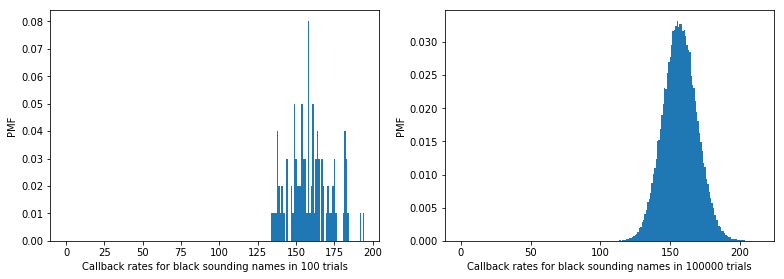

In [9]:
# First let's take 100 samples out of the binomial distribution: n_defaults
n = len(b)
plt.subplot(1, 2, 1)
n_cb1 = np.random.binomial(n , p1 , size = 100)

# Compute bin edges: bins
bins = np.arange(0, max(n_cb1) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_cb1, density=True, bins=bins)

# Label axes
_ = plt.xlabel('Callback rates for black sounding names in 100 trials')
_ = plt.ylabel('PMF')

plt.subplot(1, 2, 2)
plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
# Now, let's compare it 100000 samples out of the binomial distribution: n_defaults
n_cb2 = np.random.binomial(n ,p1 , size = 100000)

# Compute bin edges: bins
bins = np.arange(0, max(n_cb2) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_cb2, density=True, bins=bins)

# Label axes
_ = plt.xlabel('Callback rates for black sounding names in 100000 trials')
_ = plt.ylabel('PMF')

As seen from the plots above, as the sample size increases or approaches infinity, we find a normal distribution which complies with CLT.

### Question 2: What are the null and alternate hypotheses?

##### Solution:
The null hypothesis( Ho) states that there is no difference between the two population proportions i.e., the probability of getting a callback is the same for both resumes with  black-sounding names and white-sounding names for a two-tailed test:

    Ho: P1 = P2 
    
    Ha: P1 ≠ P2 



If this probability is less than 5% significance level($\alpha$), we are going to reject the null hypothesis(Ho). If p̂1 & p̂2 are equal, the actual mean of the difference($\mu$) will be:   $\mu_{p̂1-p̂2} = 0.$ 
    
Alternate hypothesis is that the probability of getting a callback is not the same for both resumes with black-sounding and white-sounding names
    
For this analysis, the significance level will be 0.05.

### Question 3: Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.

##### Solution:

#Frequentist approach:

For our hypothesis to be true, we are going to figure out the probability of getting the actual difference of black-sounding names callbacks(p1) and white-sounding names callback proportion(p2) given the assumption that our hypothesis is correct.

Null Hypothesis: the probability of success (getting a callback) is the same for both resumes with white-sounding names and black-sounding names. 


i.e Ho 🠚 p(p̂1 -p̂2)= 0

Alternate Hypothesis: the probability of success is different for resumes with white-sounding names as it is for those with black-sounding names. 

i.e Ha 🠚 p(p̂1 -p̂2) != 0


First, we calculate the z-score to find how many standard deviations away  from $\mu_{p1-p2}$ as below:

Mean of black-sounding names callbacks($\mu_1$) will be equal to p1, i,e., $\mu_1 = p1$

Mean of black-sounding names callbacks($\mu_2$) will be equal to p2, i,e., $\mu_2 = p2$

Variance of the difference of the sampling distribution :$ \sigma^2$ \=  $\hat{\sigma}_1^2  + \hat{\sigma}_2^2 $ 

Standard deviation of sampling distribution of sampling distribution =  $\sqrt{\frac{ p*(1 -p)}{n} + \frac{ p*(1 -p)}{n}}$ 


We can calculate the pooled sample proportion (p) and the standard error (SE) from the sample data. Using those measures, we can compute the z-score test statistic (z).

p = (p1 * n1 + p2 * n2) / (n1 + n2)

SE = sqrt{ p * ( 1 - p ) * [ (1/n1) + (1/n2) ] }


z-score  = $\frac{  𝑥̄-0}{\sigma_{p1-p2}}$

where the formula to calculate margin of error(m) is a little different for proportions as sown below:

$\sigma_{p1-p2}$ = $\sqrt{\frac{2p*(1-p)}{n}}$


z statistic(z) = (p1 - p2) / SE

where p1 is the sample proportion in Callback for black-sounding names, where p2 is the sample proportion in in Callback for white-sounding names, n1 is the size of sample 1(b), and n2 is the size of sample 2(w).



The confidence interval can be calculated using the formula below:

Confidendence_interval_upper_limit = 𝑥¯+ z*se

Confidendence_interval_lower_limit 𝑥¯- z*se

where  𝑥̄= sample mean

The formula to calculate margin of error(m) is a little different for proportions for 95% confidence intervals:

m = (((p*(1-p))/n)**0.5)*1.96


Critical value here is the z-statistic that we computed in the above section

Since we have a two-tailed test, the P-value is the probability of the rejection region being less than z-statistic or greater than z-score. Thus, the P-value will be 2 times the p-value we got in the result.

If p-value is less than 0.05(significance level), we reject the Null Hypothesis. Let's find out!


In [10]:
#Frequentist approach

# pooled sample proportion (p) 
p = (p1 * n1 + p2 * n2) / (n1 + n2)
print(f"Pooled sample proportion (p): {p}")

SE = ( p * ( 1 - p ) * ( (1/n1) + (1/n2) ) ) ** 0.5
print(f"Standard Error (SE) for the difference between callback rates:: {SE}")

z_stat = (p1 - p2) / SE
print(f"z-score: {z_stat}")

print(f" The difference that we got between our sample portions, between black & white-sounding callbacks of 0.05, but that is {z_stat} standard deviations above and below our mean of our sampling distributtions assuming null hypothesis to be true" )
# Find 95% confidence intervals
crit = stats.norm.isf(0.025)

# find Margin of error(moe)
m = np.abs(z_stat)  * SE
#difference in proportions(d):
d = p1 - p2

ci_95 = ( d - crit* SE, d + crit* SE)
print("95% confidence interval: ({:2.3f}, {:2.3f})".format(ci_95[0],ci_95[1]))
print(f" If our interval{ci_95} does not overlap with 0, which happens to be the assumed mean, we reject the null hypothesis")

p_val = stats.norm.cdf(z_stat)
print(f"Since we have a two-tailed test, the P-value is the probability of the rejection region being less than {round(z_stat,2)} or greater than {round(abs(z_stat),2)}.")

p_value = p_val + p_val
print('The p-value for the test of equality of callback rates is: {:1.5f}'.format(p_value))

#"The formula to calculate margin of error(m) is a little different for proportions for 95% confidence intervals:")
m = (((p*(1-p))/n)**0.5)*1.96
print('margin of error: +/-{:0.5}'.format(abs(m)))

if p_value < 0.05:
    print("Since p-value < 0.05, reject Null Hypothesis")
else:
    print("Accept null hypothesis")


Pooled sample proportion (p): 0.08049281314168377
Standard Error (SE) for the difference between callback rates:: 0.007796894036170457
z-score: -4.108412152434346
 The difference that we got between our sample portions, between black & white-sounding callbacks of 0.05, but that is -4.108412152434346 standard deviations above and below our mean of our sampling distributtions assuming null hypothesis to be true
95% confidence interval: (-0.047, -0.017)
 If our interval(-0.04731448571161482, -0.01675122270727635) does not overlap with 0, which happens to be the assumed mean, we reject the null hypothesis
Since we have a two-tailed test, the P-value is the probability of the rejection region being less than -4.11 or greater than 4.11.
The p-value for the test of equality of callback rates is: 0.00004
margin of error: +/-0.010806
Since p-value < 0.05, reject Null Hypothesis


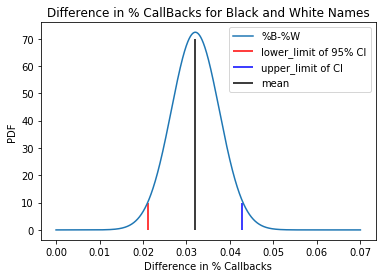

In [11]:
import pylab
## Normal Distribution of difference in percentage of Black and White Callbacks
min_p= abs(d) - m
max_p = abs(d) + m
s = (((p*(1-p))/n)**0.5)
x = np.linspace(0,0.07,4870)
y1 = stats.norm.pdf(x, loc=abs(d), scale=s)    
pylab.plot(x,y1)

pylab.xlabel('Difference in % Callbacks')
pylab.ylabel('PDF')
pylab.vlines(min_p,0, 10, color='red')
pylab.vlines(max_p,0,10, color='blue')
pylab.vlines(abs(d),0,70)
pylab.legend(['%B-%W', 'lower_limit of 95% CI', 'upper_limit of CI',"mean"])
pylab.title('Difference in % CallBacks for Black and White Names')
pylab.show()


 Two-sample Bootstrap Approach:

A two-sample bootstrap hypothesis test for difference of means We now want to test the hypothesis that  the resumes of black-souding names and white-sounding names have the same  mean using the two-sample bootstrap test. Here, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value will be the fraction of replicates with a difference in means greater than or equal to what was observed.



In [12]:
#The bootstrap_replicate_1d() function is provided below:

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
    
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#Total number of resumes viewed whether call_backs or no callbacks based on race
b_c = np.array([True] * int(n_b) + [False] * int(n1 -n_b ))
w_c = np.array([True] * int(n_w) + [False] * int(n2 -n_w ))

# Concatenate all
all_concat = np.concatenate((b_c, w_c))
# Compute mean of all forces: mean_force
mean_callbacks = np.mean(all_concat)

# Generate shifted arrays
b_shifted = b_c - np.mean(b_c) + mean_callbacks
w_shifted = w_c - np.mean(w_c) + mean_callbacks

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_b = draw_bs_reps(b_shifted, np.mean,size= 10000)
bs_replicates_w = draw_bs_reps(w_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_b - bs_replicates_w


# Compute difference of mean  from experiment: empirical_diff_means
empirical_diff_means = np.mean(b_c) -  np.mean(w_c)
print(f"empirical_diff_means : {empirical_diff_means}")


# Compute and print p-value: p
p = np.sum(bs_replicates == empirical_diff_means) / len(bs_replicates)

#Confidence Interval(ci)
ci = np.percentile(bs_replicates, [2.5, 97.5])
print(f"95% confidence interval  of the  mean difference estimate by performing bootstrap resampling is : {ci}")
print('p-value :', p)
if p < 0.05:
    print("Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with 95 % confidence")
else:
    print("Accept null hypothesis")

empirical_diff_means : -0.032032854209445585
95% confidence interval  of the  mean difference estimate by performing bootstrap resampling is : [-0.01519507  0.01519507]
p-value : 0.0
Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with 95 % confidence


### Question 4: Write a story describing the statistical significance in the context or the original problem.

##### Solution:
Resumes with black-sounding names received a callback rate of 6.4%, while white names receivde a callback rate of 9.6%. Since we got p-value score which was less than 0.05 significance level in both frequentist approach and bootstrap approach, it has been proven that the difference of 3.2% is statistically significant. It is safe to assume that racial discrmination in the U.S. labor market still appears to be a challenge.

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

#### Analysis:
Eventhough it looks like race can be a prominent factor to receive a call from prospective employees for interview based on our hypothesis, however race cannot be the only factor. Employees determine if the candidate is a good fit or not based on education, years of experience, location, voluntary experience, and technical skills and other variables in the dataset that can be taken into consideration.